In [166]:
import pandas as pd

In [167]:
n10m2_A = 763  # ótimo
n10m2_B = 696  # ótimo
n15m3_A = 1006
n15m3_B = 1055
n15m4_A = 688
n15m4_B = 784
n29m4_A = 1459
n29m4_B = 1527
n29m6_A = 1101
n29m6_B = 1043
n40m5_A = 447
n40m5_B = 581
n52m5_A = 7070
n52m5_B = 6924
n450m16_A = 4750
n500m10_A = 5608

lista_otimos = [
    n10m2_A,
    n10m2_B,
    n15m3_A,
    n15m3_B,
    n15m4_A,
    n15m4_B,
    n29m4_A,
    n29m4_B,
    n29m6_A,
    n29m6_B,
    n40m5_A,
    n40m5_B,
    n52m5_A,
    n52m5_B,
    n450m16_A,
    n500m10_A,
]

lista_otimos 

[763,
 696,
 1006,
 1055,
 688,
 784,
 1459,
 1527,
 1101,
 1043,
 447,
 581,
 7070,
 6924,
 4750,
 5608]

In [168]:
def calcula_gap(opt, heuristica):
    return 100 * (heuristica - opt) / opt

In [169]:
instancias = ['n10m2_A', 'n10m2_B', 'n15m3_A', 'n15m3_B', 'n15m4_A', 'n15m4_B',
       'n29m4_A', 'n29m4_B', 'n29m6_A', 'n29m6_B', 'n40m5_A', 'n40m5_B',
       'n52m5_A', 'n52m5_B', 'n450m16_A', 'n500m10_A']
instancias

['n10m2_A',
 'n10m2_B',
 'n15m3_A',
 'n15m3_B',
 'n15m4_A',
 'n15m4_B',
 'n29m4_A',
 'n29m4_B',
 'n29m6_A',
 'n29m6_B',
 'n40m5_A',
 'n40m5_B',
 'n52m5_A',
 'n52m5_B',
 'n450m16_A',
 'n500m10_A']

In [170]:
pc_linux = "" # "/home/mikenew/projeto_APA/"

custos_df = pd.read_csv(pc_linux + "resultados/dados/resultados_custo.csv")
construcao_df = pd.read_csv(pc_linux + "resultados/dados/resultados_construcao.csv")
vnd_df = pd.read_csv(pc_linux + "resultados/dados/resultados_VND.csv")

tempos_custos_df = pd.read_csv(pc_linux + "resultados/dados/resultados_custo_tempo.csv")
tempos_construcao_df = pd.read_csv(pc_linux + "resultados/dados/resultados_construcao_tempo.csv")
tempos_vnd_df = pd.read_csv(pc_linux + "resultados/dados/resultados_VND_tempo.csv")

In [171]:
custos_df["media"] = custos_df.iloc[:, 3:].mean(axis=1)
custos_df["tempo"] = tempos_custos_df.iloc[:, 3:].mean(axis=1)
melhores_df = custos_df.sort_values(by=["media", "tempo"], ascending=[True, True]).head(10)
melhores_df

,alpha,Iter_GRASP,Iter_ILS,n10m2_A,n10m2_B,n15m3_A,n15m3_B,n15m4_A,n15m4_B,n29m4_A,...,n29m6_A,n29m6_B,n40m5_A,n40m5_B,n52m5_A,n52m5_B,n450m16_A,n500m10_A,media,tempo
44,1.00,1024,16,763.0,696.0,1006.0,1055.0,716.0,794.0,1400.0,...,1034.0,1051.0,429.0,558.0,6612.0,6760.0,5244.0,6056.0,2229.6875,80.188795
70,1.00,1024,32,763.0,696.0,1006.0,1055.0,688.0,786.0,1398.0,...,1034.0,1057.0,433.0,574.0,6554.0,6775.0,5444.0,6159.0,2244.5000,31.786217
69,1.00,1024,16,763.0,696.0,1006.0,1056.0,699.0,786.0,1398.0,...,1034.0,1107.0,433.0,574.0,6554.0,6751.0,5367.0,6201.0,2244.6875,23.331757
36,1.00,512,8,763.0,696.0,1024.0,1056.0,731.0,794.0,1401.0,...,1063.0,1045.0,440.0,558.0,6587.0,6616.0,5623.0,6031.0,2244.9375,25.633460
88,0.85,700,150,763.0,696.0,1020.0,1055.0,697.0,786.0,1399.0,...,1037.0,1064.0,435.0,567.0,6731.0,6690.0,5279.0,6283.0,2250.3750,61.613933
77,1.00,1024,17,763.0,696.0,1021.0,1058.0,704.0,784.0,1422.0,...,1022.0,1057.0,429.0,565.0,6703.0,6665.0,5366.0,6252.0,2250.6875,69.885326
82,0.90,1024,16,763.0,696.0,1007.0,1054.0,697.0,794.0,1399.0,...,1034.0,1046.0,441.0,562.0,6620.0,6713.0,5414.0,6289.0,2251.0625,24.669427
75,0.90,500,100,763.0,696.0,1006.0,1055.0,688.0,786.0,1388.0,...,1042.0,1050.0,437.0,567.0,6438.0,6860.0,5465.0,6284.0,2251.5625,42.452854
68,0.90,1024,16,763.0,696.0,1020.0,1056.0,688.0,794.0,1402.0,...,1020.0,1082.0,440.0,565.0,6693.0,6751.0,5435.0,6161.0,2254.1875,22.804825
46,1.00,1024,16,763.0,696.0,1021.0,1055.0,694.0,789.0,1386.0,...,1052.0,1063.0,436.0,562.0,6733.0,6662.0,5620.0,6090.0,2256.2500,117.993700


In [172]:
best_is = melhores_df.index

In [173]:
print("Custo médio de todas as instancias:")

aux_df = custos_df.iloc[:, 3:]
n, _ = aux_df.shape

best_media = 999999
best_i = -1

for i in range(0, n):

    media_resultados_atual = aux_df.iloc[i, :].mean()
    print(f"Linha {i}, EXEC: {custos_df.iloc[i, 0]:>3}, GRAPS: {custos_df.iloc[i, 1]:>3}, ILS: {custos_df.iloc[i, 2]:>3}, {media_resultados_atual}")
    if aux_df.iloc[i, :].mean() < best_media:
        best_media = media_resultados_atual
        best_i = i

print(f"\nMelhor resultado: {best_media} na linha {best_i}")
print(f"Linha {best_i}, EXEC: {custos_df.iloc[best_i, 0]:>3}, GRAPS: {custos_df.iloc[best_i, 1]:>3}, ILS: {custos_df.iloc[best_i, 2]:>3}, {best_media}")

Custo médio de todas as instancias:
Linha 0, EXEC: 10.0, GRAPS:   1, ILS:   1, 2726.9069526631947
Linha 1, EXEC: 10.0, GRAPS:   2, ILS:   1, 2751.818810472222
Linha 2, EXEC: 10.0, GRAPS: 256, ILS:   8, 2206.7989895486107
Linha 3, EXEC: 10.0, GRAPS: 256, ILS:  12, 2210.7958909305557
Linha 4, EXEC: 10.0, GRAPS: 512, ILS:   8, 2186.5164997118054
Linha 5, EXEC: 10.0, GRAPS: 500, ILS:  16, 2184.207361538194
Linha 6, EXEC: 10.0, GRAPS: 256, ILS:  14, 2208.847288517361
Linha 7, EXEC: 10.0, GRAPS: 256, ILS:   8, 2196.254610142361
Linha 8, EXEC: 10.0, GRAPS: 300, ILS:   4, 2191.7447739166664
Linha 9, EXEC: 10.0, GRAPS: 300, ILS:   4, 2207.522281465278
Linha 10, EXEC: 10.0, GRAPS: 300, ILS:   4, 2197.6600873506945
Linha 11, EXEC: 10.0, GRAPS: 300, ILS:   6, 2210.9400704375
Linha 12, EXEC: 10.0, GRAPS: 300, ILS:   6, 2208.549961722222
Linha 13, EXEC: 10.0, GRAPS: 256, ILS:   6, 2231.6694686736114
Linha 14, EXEC: 10.0, GRAPS: 256, ILS:   8, 2210.0314875868053
Linha 15, EXEC: 10.0, GRAPS: 256, ILS:

In [174]:
analise_df = custos_df.sort_values(by=['media', 'tempo']).T.copy()
analise_df.drop(instancias, inplace=True, axis=0)
analise_df = round(analise_df, 2)
analise_df

,44,70,69,36,88,77,82,75,68,46,...,33,61,20,19,17,18,58,62,0,1
alpha,1.00,1.00,1.00,1.00,0.85,1.00,0.90,0.90,0.90,1.00,...,10.00,1.00,10.00,10.00,10.00,10.00,1.00,1.00,10.00,10.00
Iter_GRASP,1024.00,1024.00,1024.00,512.00,700.00,1024.00,1024.00,500.00,1024.00,1024.00,...,256.00,32.00,128.00,64.00,64.00,64.00,10.00,3.00,1.00,2.00
Iter_ILS,16.00,32.00,16.00,8.00,150.00,17.00,16.00,100.00,16.00,16.00,...,4.00,16.00,4.00,4.00,2.00,4.00,200.00,4.00,1.00,1.00
media,2229.69,2244.50,2244.69,2244.94,2250.38,2250.69,2251.06,2251.56,2254.19,2256.25,...,2371.79,2385.25,2390.42,2394.19,2401.44,2424.38,2429.00,2684.56,2887.31,2913.69
tempo,80.19,31.79,23.33,25.63,61.61,69.89,24.67,42.45,22.80,117.99,...,0.96,51.23,0.46,0.23,0.14,0.23,10.52,0.29,0.01,0.05


In [175]:
len_lista_otimos = len(lista_otimos)
tolerancia_overflow = 99999

In [176]:
dict_construcao = {"OPT": [], "VALOR_CONST":[], "GAP_CONST": [], "TEMPO_CONST": []}

i = 0

for k, v in construcao_df.iloc[best_i, 3:].items():

    dict_construcao["OPT"].append(lista_otimos[i])
    dict_construcao["VALOR_CONST"].append(v)
    dict_construcao["GAP_CONST"].append(calcula_gap(lista_otimos[i], v))
    dict_construcao["GAP_CONST"] = [round(float(x), 2) for x in dict_construcao["GAP_CONST"]]
    dict_construcao["TEMPO_CONST"].append(tempos_construcao_df.iloc[best_i, 3 + i])

    for j in range(0, len(dict_construcao["TEMPO_CONST"])):
        if dict_construcao["TEMPO_CONST"][j] > tolerancia_overflow:
            dict_construcao["TEMPO_CONST"][j] = 0

    i += 1
    

print("\nTabela de resultados para a Construção:")
tabela_construcao = pd.DataFrame(dict_construcao, index=custos_df.columns[3: len_lista_otimos + 3])
tabela_construcao


Tabela de resultados para a Construção:


,OPT,VALOR_CONST,GAP_CONST,TEMPO_CONST
n10m2_A,763,973.0,27.52,0.0
n10m2_B,696,1092.0,56.90,0.0
n15m3_A,1006,1231.0,22.37,0.0
n15m3_B,1055,1204.0,14.12,0.0
n15m4_A,688,778.0,13.08,0.0
n15m4_B,784,1118.0,42.60,0.0
n29m4_A,1459,2061.0,41.26,0.0
n29m4_B,1527,1718.0,12.51,0.0
n29m6_A,1101,1542.0,40.05,0.0
n29m6_B,1043,1451.0,39.12,0.0


In [177]:
dict_vnd = {"OPT": [], "VALOR_VND":[], "GAP_VND": [], "TEMPO_VND": []}

i = 0

for k, v in vnd_df.iloc[best_i, 3:].items():


    dict_vnd["OPT"].append(lista_otimos[i])
    dict_vnd["VALOR_VND"].append(v)
    dict_vnd["GAP_VND"].append(calcula_gap(lista_otimos[i], v))
    dict_vnd["GAP_VND"] = [round(float(x), 2) for x in dict_vnd["GAP_VND"]]
    dict_vnd["TEMPO_VND"].append(tempos_vnd_df.iloc[best_i, 3 + i])

    for j in range(0, len(dict_vnd["TEMPO_VND"])):
        if dict_vnd["TEMPO_VND"][j] > tolerancia_overflow:
            dict_vnd["TEMPO_VND"][j] = 0
    
    i += 1

    
print("\nTabela de resultados para o VND:")
tabela_vnd = pd.DataFrame(dict_vnd, index=custos_df.columns[3: len_lista_otimos + 3])
tabela_vnd


Tabela de resultados para o VND:


,OPT,VALOR_VND,GAP_VND,TEMPO_VND
n10m2_A,763,808.0,5.90,0.0
n10m2_B,696,1000.0,43.68,0.0
n15m3_A,1006,1231.0,22.37,0.0
n15m3_B,1055,1204.0,14.12,0.0
n15m4_A,688,778.0,13.08,0.0
n15m4_B,784,1117.0,42.47,0.0
n29m4_A,1459,1925.0,31.94,0.0
n29m4_B,1527,1718.0,12.51,0.0
n29m6_A,1101,1542.0,40.05,0.0
n29m6_B,1043,1451.0,39.12,0.0


In [178]:
dict_ils = {"OPT": [], "VALOR_META":[], "GAP_META": [], "TEMPO_META": []}

i = 0

for k, v in custos_df.iloc[best_i, 3:].items():

    dict_ils["OPT"].append(lista_otimos[i])
    dict_ils["VALOR_META"].append(v)
    dict_ils["GAP_META"].append(calcula_gap(lista_otimos[i], v))
    dict_ils["GAP_META"] = [round(float(x), 2) for x in dict_ils["GAP_META"]]
    dict_ils["TEMPO_META"].append(tempos_custos_df.iloc[best_i, 3 + i])

    for j in range(0, len(dict_ils["TEMPO_META"])):
        if dict_ils["TEMPO_META"][j] > tolerancia_overflow:
            dict_ils["TEMPO_META"][j] = 0

    i += 1
    if i == len(lista_otimos):
        break

    

print("\nTabela de resultados para o ILS:")
tabela_ils = pd.DataFrame(dict_ils, index=custos_df.columns[3: len_lista_otimos + 3])
tabela_ils



Tabela de resultados para o ILS:


,OPT,VALOR_META,GAP_META,TEMPO_META
n10m2_A,763,763.0,0.00,0.207584
n10m2_B,696,696.0,0.00,0.199896
n15m3_A,1006,1006.0,0.00,0.415369
n15m3_B,1055,1055.0,0.00,0.404182
n15m4_A,688,716.0,4.07,0.416194
n15m4_B,784,794.0,1.28,0.421028
n29m4_A,1459,1400.0,-4.04,1.378347
n29m4_B,1527,1501.0,-1.70,1.378123
n29m6_A,1101,1034.0,-6.09,1.373168
n29m6_B,1043,1051.0,0.77,1.425908


In [179]:
tabela_geral = pd.concat([tabela_construcao, tabela_vnd.iloc[:, 1:], tabela_ils.iloc[:, 1:]], axis=1)
tabela_geral

,OPT,VALOR_CONST,GAP_CONST,TEMPO_CONST,VALOR_VND,GAP_VND,TEMPO_VND,VALOR_META,GAP_META,TEMPO_META
n10m2_A,763,973.0,27.52,0.0,808.0,5.90,0.0,763.0,0.00,0.207584
n10m2_B,696,1092.0,56.90,0.0,1000.0,43.68,0.0,696.0,0.00,0.199896
n15m3_A,1006,1231.0,22.37,0.0,1231.0,22.37,0.0,1006.0,0.00,0.415369
n15m3_B,1055,1204.0,14.12,0.0,1204.0,14.12,0.0,1055.0,0.00,0.404182
n15m4_A,688,778.0,13.08,0.0,778.0,13.08,0.0,716.0,4.07,0.416194
n15m4_B,784,1118.0,42.60,0.0,1117.0,42.47,0.0,794.0,1.28,0.421028
n29m4_A,1459,2061.0,41.26,0.0,1925.0,31.94,0.0,1400.0,-4.04,1.378347
n29m4_B,1527,1718.0,12.51,0.0,1718.0,12.51,0.0,1501.0,-1.70,1.378123
n29m6_A,1101,1542.0,40.05,0.0,1542.0,40.05,0.0,1034.0,-6.09,1.373168
n29m6_B,1043,1451.0,39.12,0.0,1451.0,39.12,0.0,1051.0,0.77,1.425908


In [180]:
# make the index of the dataframe a column
tabela_aux = tabela_geral.reset_index(level=0, inplace=False).copy()
tabela_aux.rename(columns={"index": "INSTANCIA"}, inplace=True)
tabela_aux = round(tabela_aux, 2)
tabela_aux

,INSTANCIA,OPT,VALOR_CONST,GAP_CONST,TEMPO_CONST,VALOR_VND,GAP_VND,TEMPO_VND,VALOR_META,GAP_META,TEMPO_META
0,n10m2_A,763,973.0,27.52,0.0,808.0,5.90,0.0,763.0,0.00,0.21
1,n10m2_B,696,1092.0,56.90,0.0,1000.0,43.68,0.0,696.0,0.00,0.20
2,n15m3_A,1006,1231.0,22.37,0.0,1231.0,22.37,0.0,1006.0,0.00,0.42
3,n15m3_B,1055,1204.0,14.12,0.0,1204.0,14.12,0.0,1055.0,0.00,0.40
4,n15m4_A,688,778.0,13.08,0.0,778.0,13.08,0.0,716.0,4.07,0.42
5,n15m4_B,784,1118.0,42.60,0.0,1117.0,42.47,0.0,794.0,1.28,0.42
6,n29m4_A,1459,2061.0,41.26,0.0,1925.0,31.94,0.0,1400.0,-4.04,1.38
7,n29m4_B,1527,1718.0,12.51,0.0,1718.0,12.51,0.0,1501.0,-1.70,1.38
8,n29m6_A,1101,1542.0,40.05,0.0,1542.0,40.05,0.0,1034.0,-6.09,1.37
9,n29m6_B,1043,1451.0,39.12,0.0,1451.0,39.12,0.0,1051.0,0.77,1.43


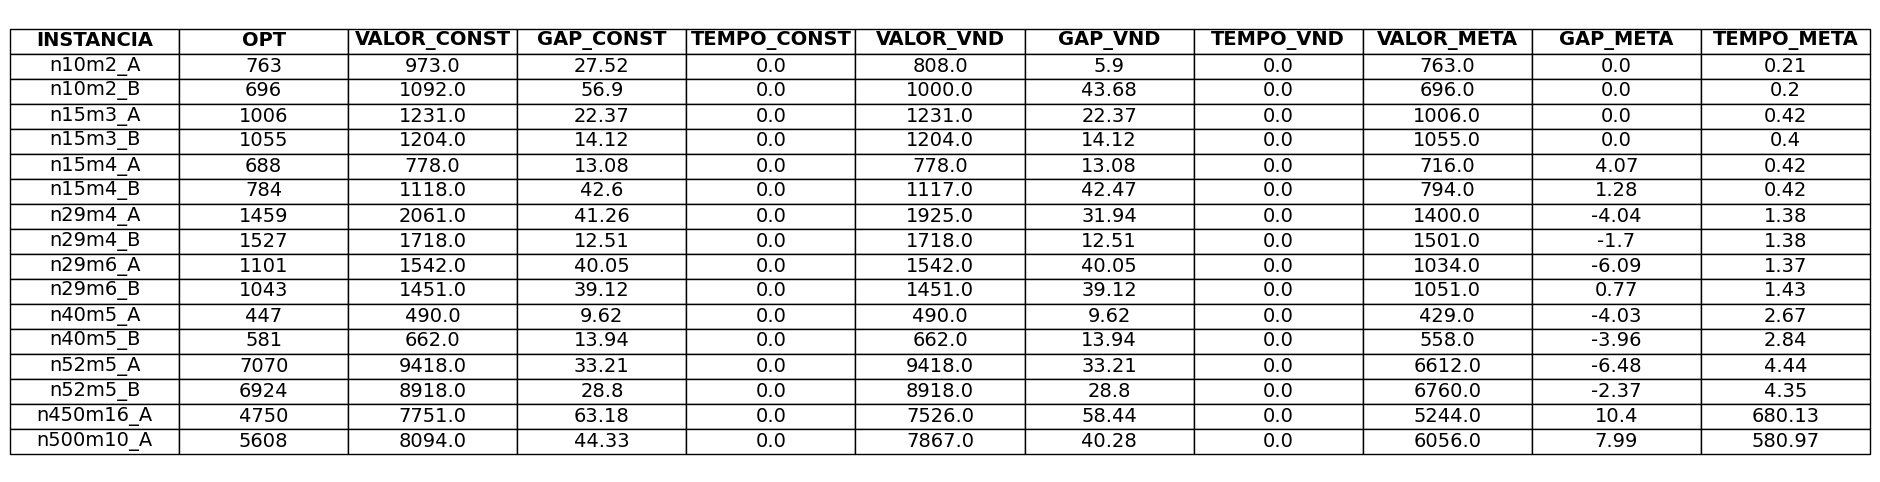

In [181]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.figure.set_size_inches(24 , 6)

ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=tabela_aux.values, colLabels=tabela_aux.columns, loc='center', cellLoc='center')

# Aumentar o tamanho dos textos das células
table.auto_set_font_size(False)
table.set_fontsize(14)

table.scale(1, 1.5)

for i, col_label in enumerate(tabela_aux.columns):
    table[0, i].set_text_props(fontweight='bold')


# plt.show()
plt.savefig('./resultados/tabelas/tabela_melhor_resultados.png')

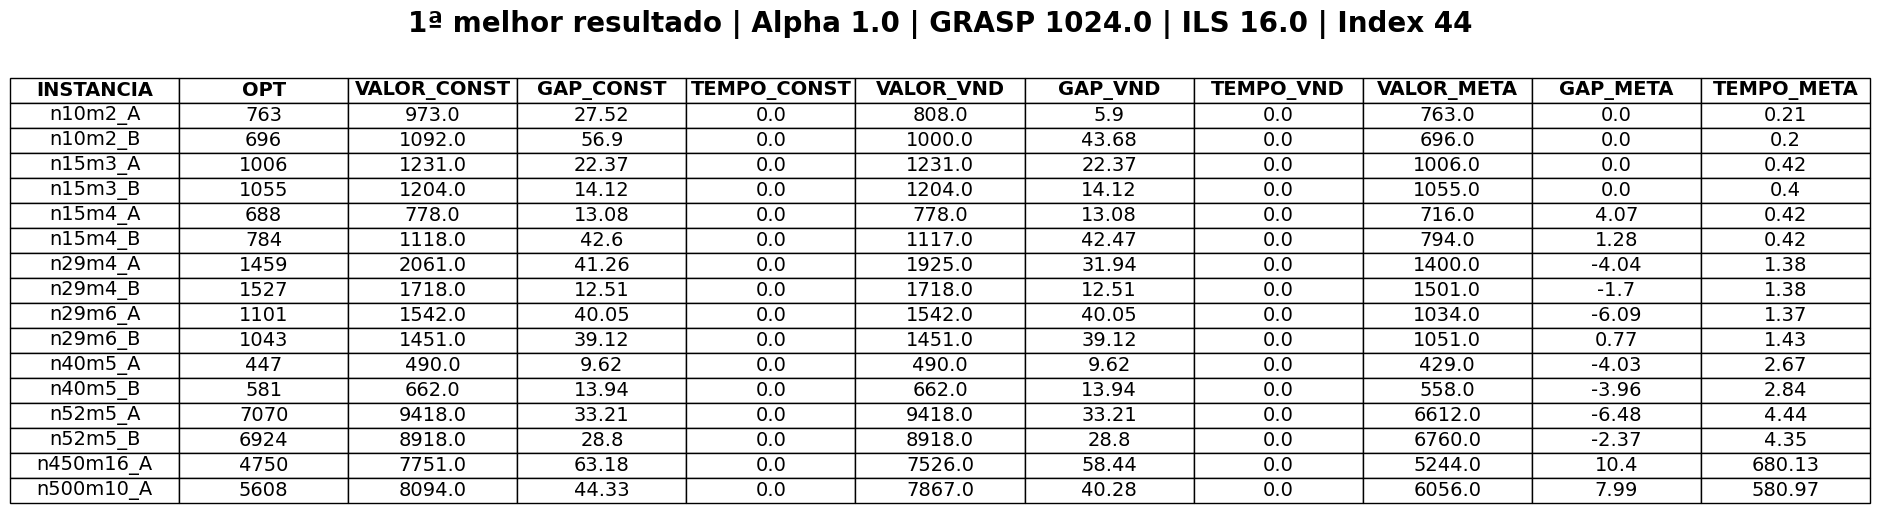

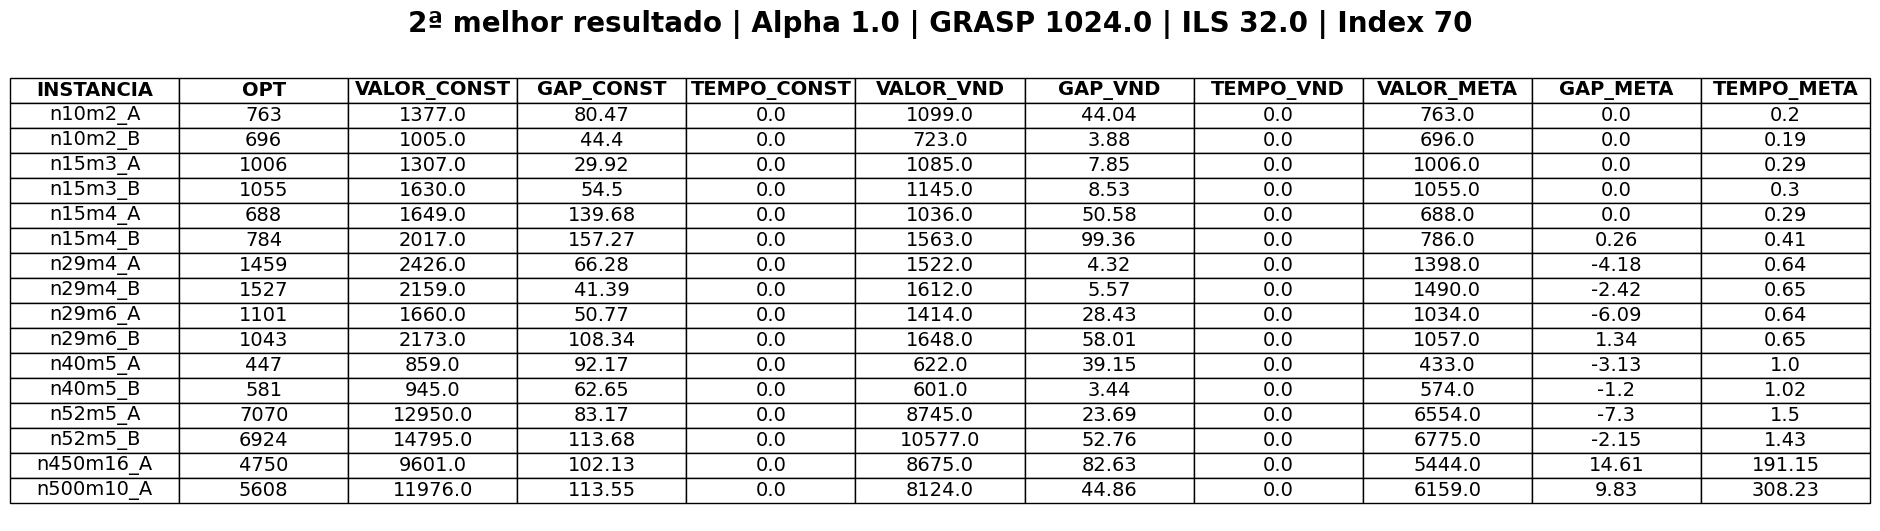

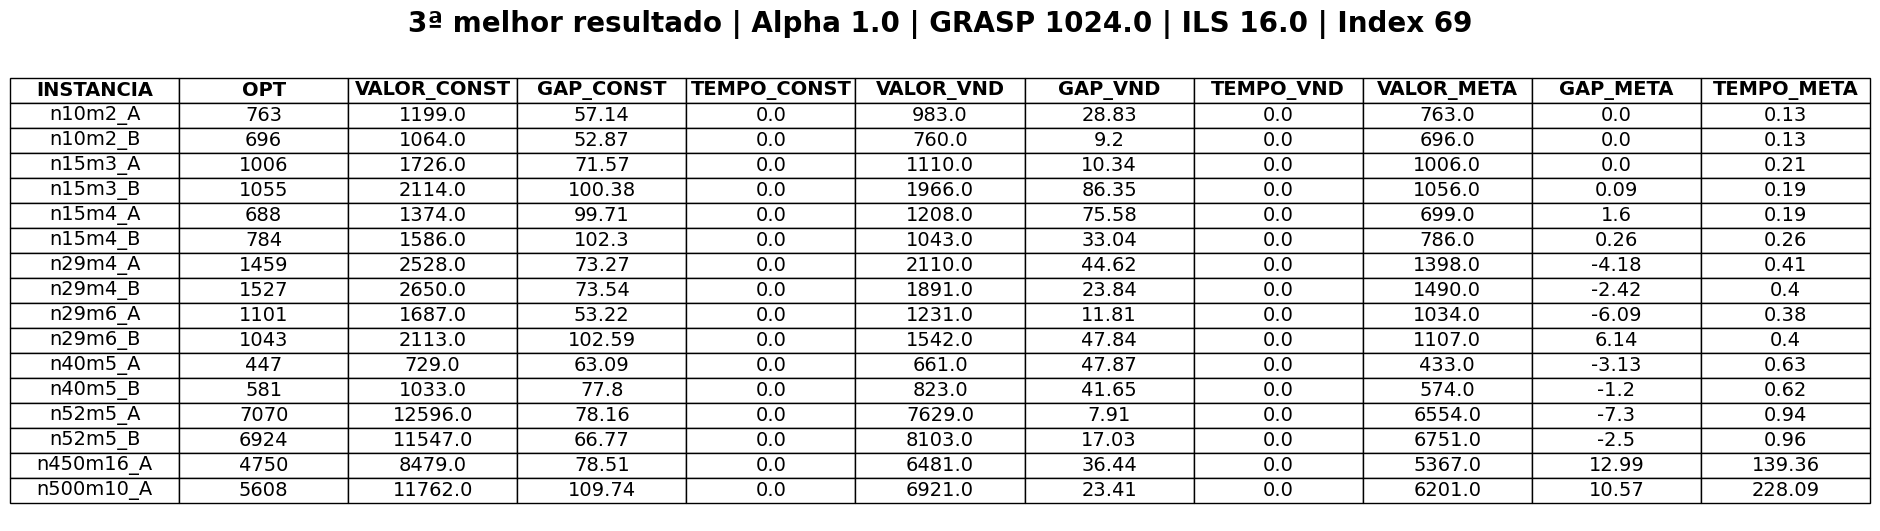

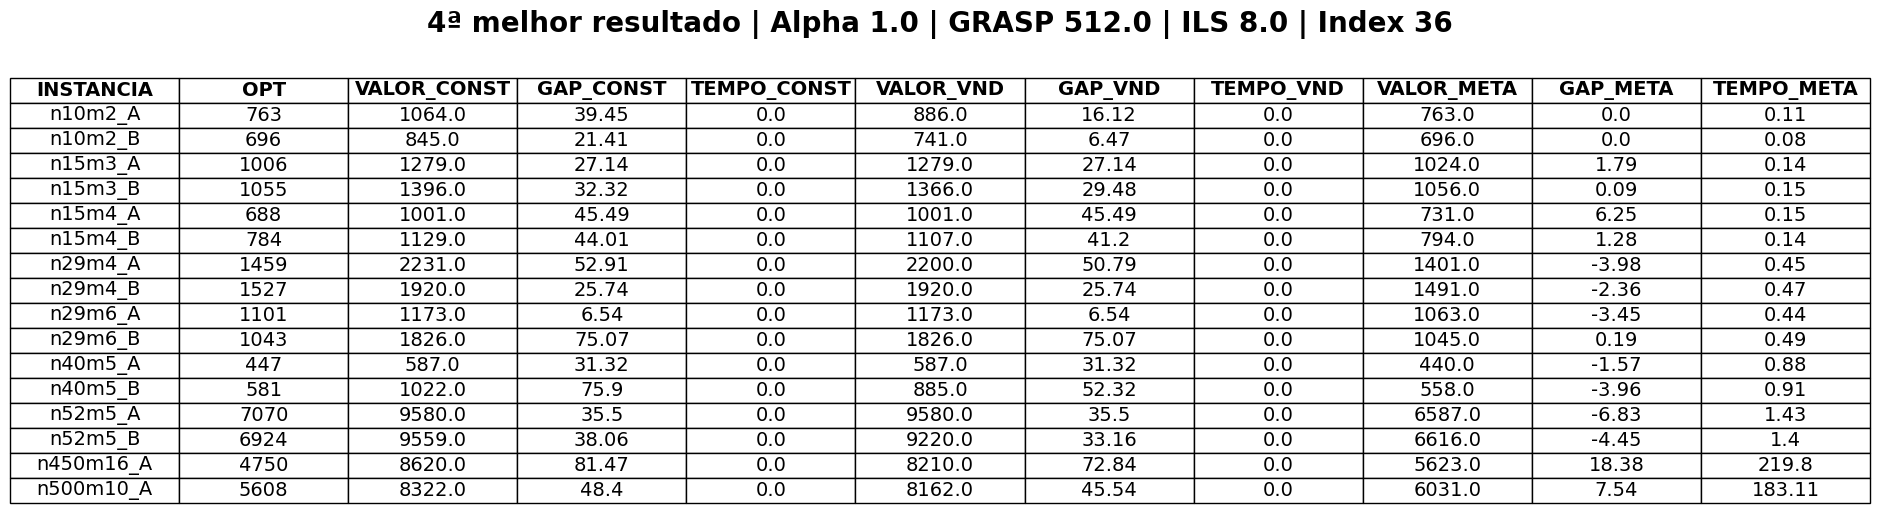

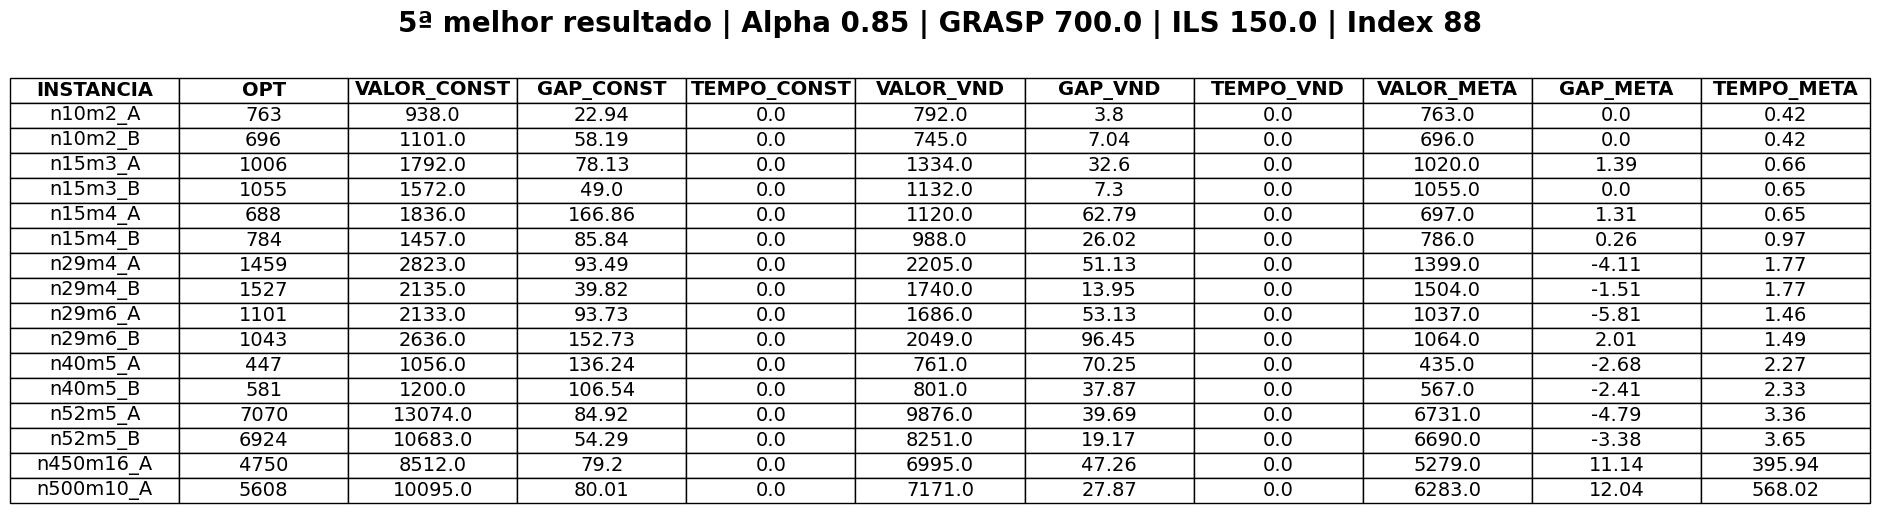

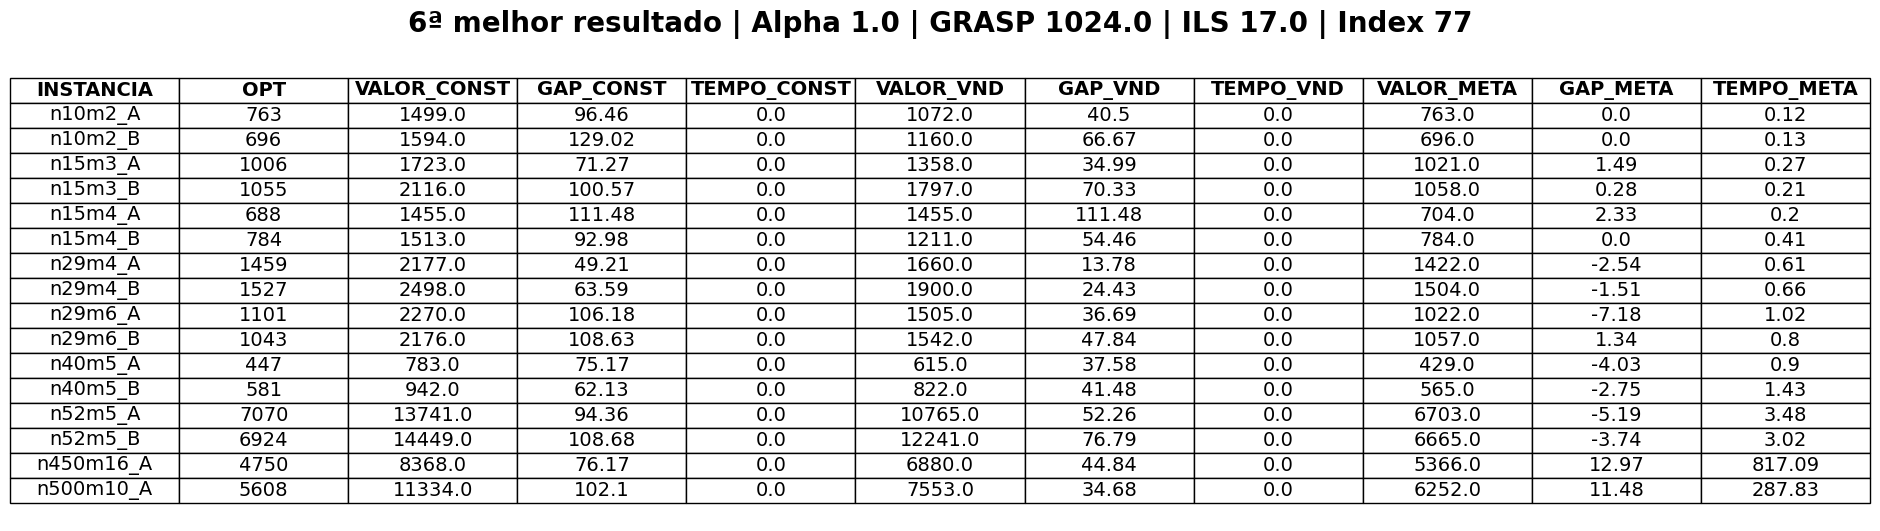

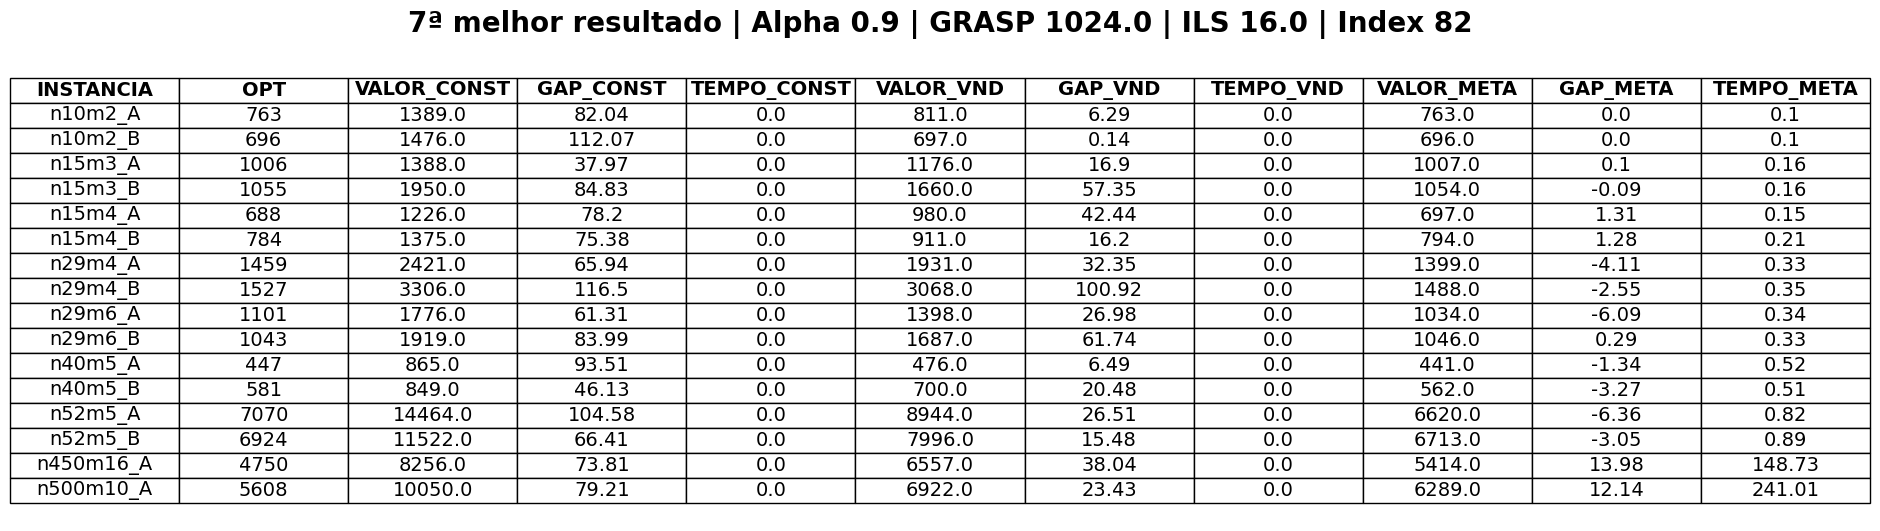

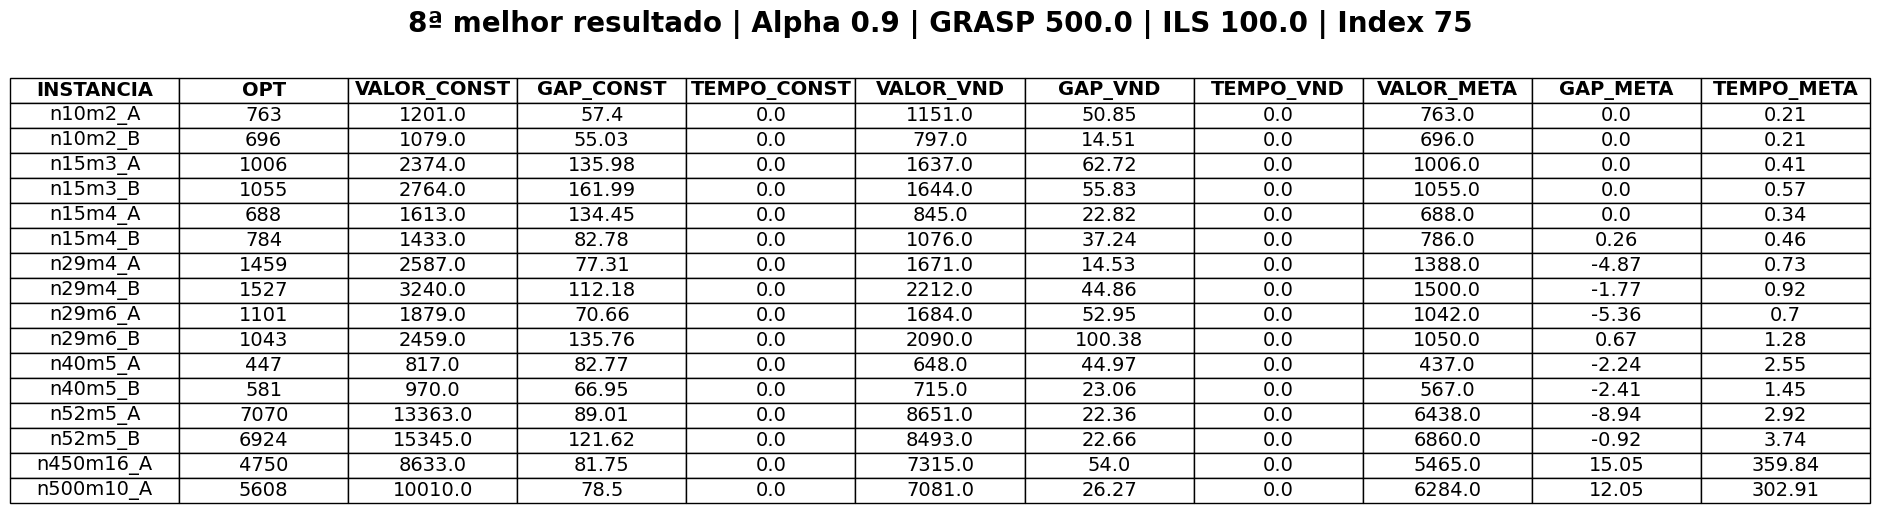

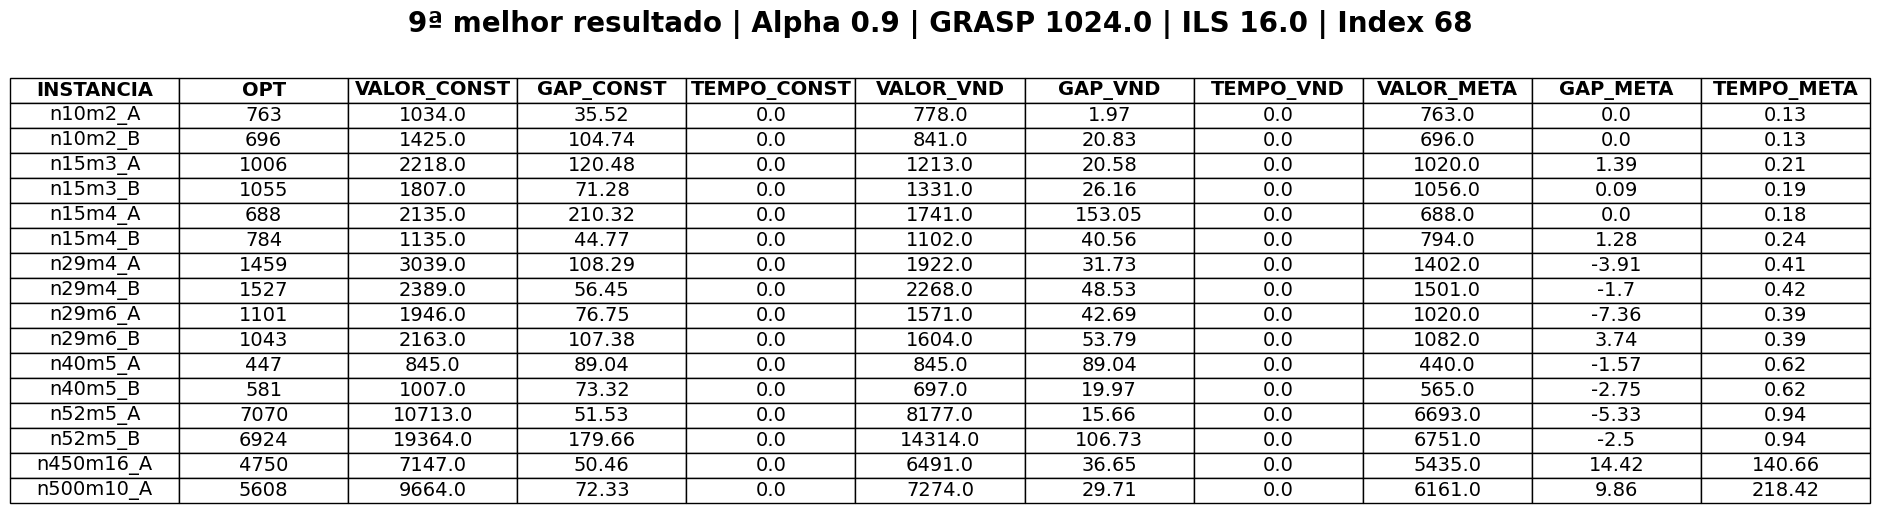

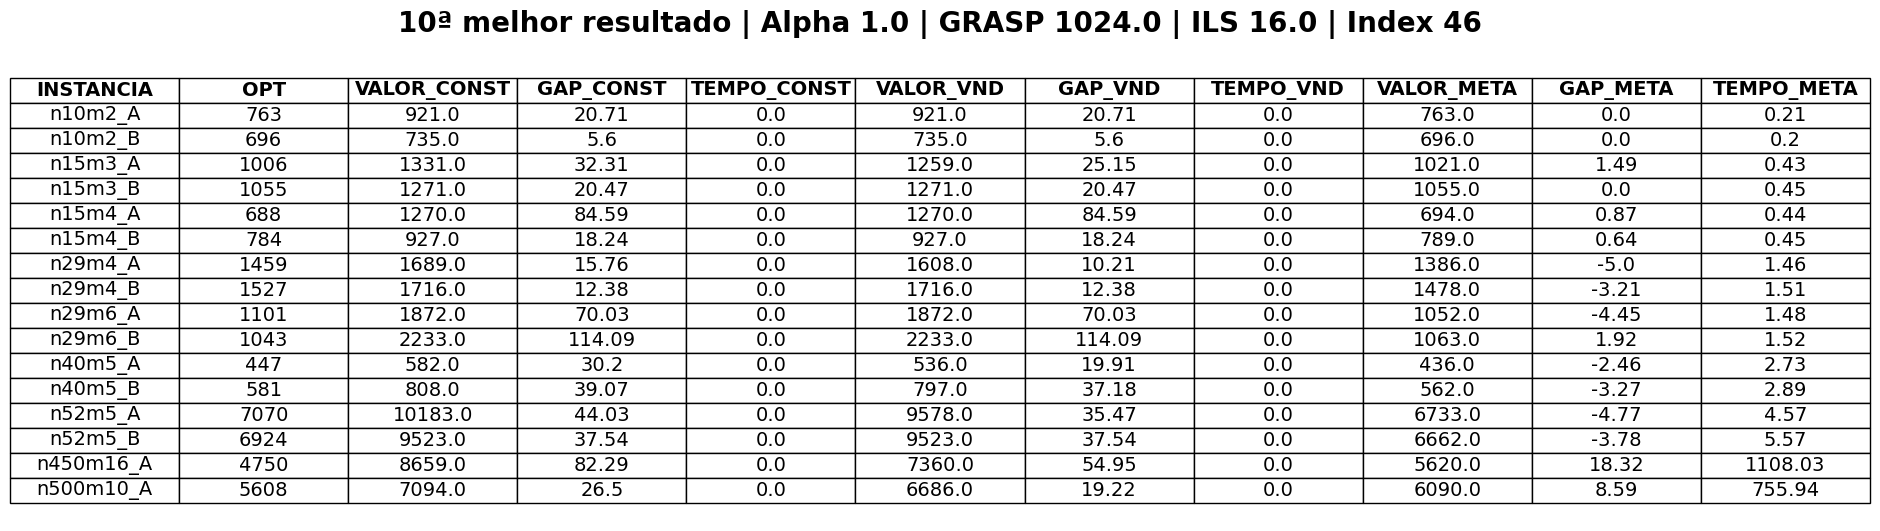

In [182]:
tolerancia_overflow = 99999

for pos, best_i in enumerate(best_is):
    

    dict_construcao = {"OPT": [], "VALOR_CONST":[], "GAP_CONST": [], "TEMPO_CONST": []}
    dict_vnd =  {"OPT": [], "VALOR_VND":[], "GAP_VND": [], "TEMPO_VND": []}
    dict_ils = {"OPT": [], "VALOR_META":[], "GAP_META": [], "TEMPO_META": []}

    i = 0

    for k, v in construcao_df.iloc[best_i, 3:].items():

        dict_construcao["OPT"].append(lista_otimos[i])
        dict_construcao["VALOR_CONST"].append(v)
        dict_construcao["GAP_CONST"].append(calcula_gap(lista_otimos[i], v))
        dict_construcao["GAP_CONST"] = [round(float(x), 2) for x in dict_construcao["GAP_CONST"]]
        dict_construcao["TEMPO_CONST"].append(tempos_construcao_df.iloc[best_i, 3 + i])

        for j in range(0, len(dict_construcao["TEMPO_CONST"])):
            if dict_construcao["TEMPO_CONST"][j] > tolerancia_overflow:
                dict_construcao["TEMPO_CONST"][j] = 0

        i += 1


    i = 0

    for k, v in vnd_df.iloc[best_i, 3:].items():


        dict_vnd["OPT"].append(lista_otimos[i])
        dict_vnd["VALOR_VND"].append(v)
        dict_vnd["GAP_VND"].append(calcula_gap(lista_otimos[i], v))
        dict_vnd["GAP_VND"] = [round(float(x), 2) for x in dict_vnd["GAP_VND"]]
        dict_vnd["TEMPO_VND"].append(tempos_vnd_df.iloc[best_i, 3 + i])

        for j in range(0, len(dict_vnd["TEMPO_VND"])):
            if dict_vnd["TEMPO_VND"][j] > tolerancia_overflow:
                dict_vnd["TEMPO_VND"][j] = 0
        
        i += 1


    i = 0

    for k, v in custos_df.iloc[best_i, 3:].items():

        dict_ils["OPT"].append(lista_otimos[i])
        dict_ils["VALOR_META"].append(v)
        dict_ils["GAP_META"].append(calcula_gap(lista_otimos[i], v))
        dict_ils["GAP_META"] = [round(float(x), 2) for x in dict_ils["GAP_META"]]
        dict_ils["TEMPO_META"].append(tempos_custos_df.iloc[best_i, 3 + i])

        for j in range(0, len(dict_ils["TEMPO_META"])):
            if dict_ils["TEMPO_META"][j] > tolerancia_overflow:
                dict_ils["TEMPO_META"][j] = 0

        i += 1
        if i == len(lista_otimos):
            break
    
    tabela_construcao = pd.DataFrame(dict_construcao, index=custos_df.columns[3: len_lista_otimos + 3])
    tabela_vnd = pd.DataFrame(dict_vnd, index=custos_df.columns[3: len_lista_otimos + 3])
    tabela_ils = pd.DataFrame(dict_ils, index=custos_df.columns[3: len_lista_otimos + 3])
    tabela_geral = pd.concat([tabela_construcao, tabela_vnd.iloc[:, 1:], tabela_ils.iloc[:, 1:]], axis=1)
    
    tabela_aux = tabela_geral.reset_index(level=0, inplace=False).copy()
    tabela_aux.rename(columns={"index": "INSTANCIA"}, inplace=True)
    tabela_aux = round(tabela_aux, 2)

    fig, ax = plt.subplots()
    ax.figure.set_size_inches(24 , 6)

    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=tabela_aux.values, colLabels=tabela_aux.columns, loc='center', cellLoc='center')

    # Aumentar o tamanho dos textos das células
    table.auto_set_font_size(False)
    table.set_fontsize(14)

    table.scale(1, 1.5)

    for i, col_label in enumerate(tabela_aux.columns):
        table[0, i].set_text_props(fontweight='bold')

    alpha, iter_grasp, iter_ils = custos_df.iloc[best_i, :3]

    
    plt.title(f"{pos + 1}ª melhor resultado | Alpha {alpha} | GRASP {iter_grasp} | ILS {iter_ils} | Index {best_i}", fontsize=20, pad=20, fontweight='bold')
    plt.savefig(f'./resultados/tabelas/tabela_{pos + 1}_melhor_resultado.png')
    plt.show()